<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_R/NY_birth_timeseries_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

뉴욕 출생자 시계열 분석, 예측, ARIMA모형




In [9]:
library(TTR)
library(forecast)
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [11]:
data <- scan("https://robjhyndman.com/tsdldata/data/nybirths.dat")
birth <- ts(data,frequency=12, start = c(1946,1))

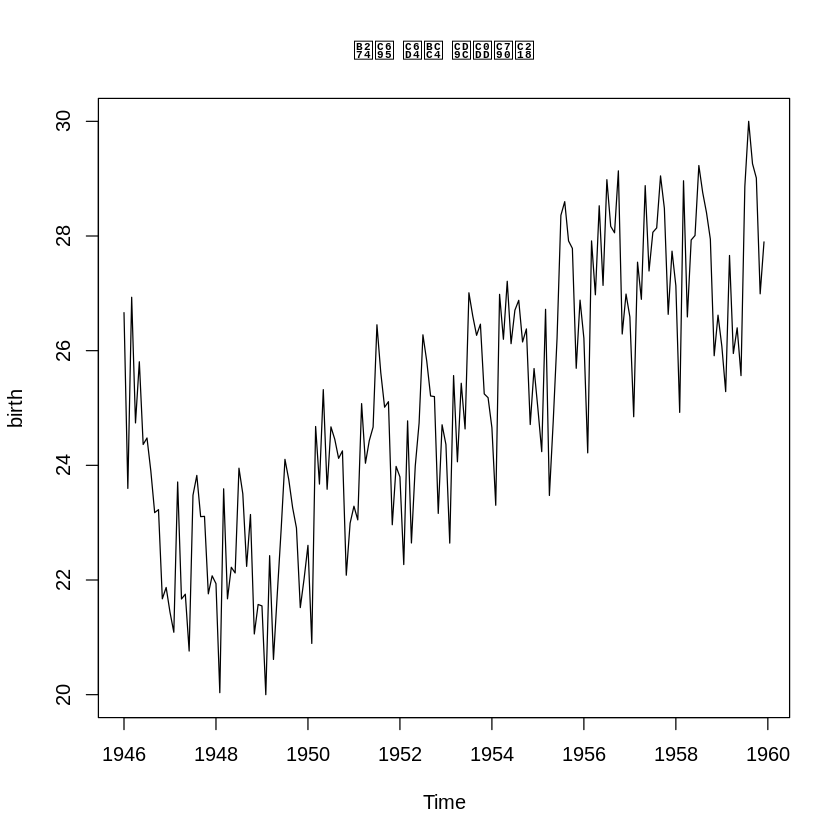

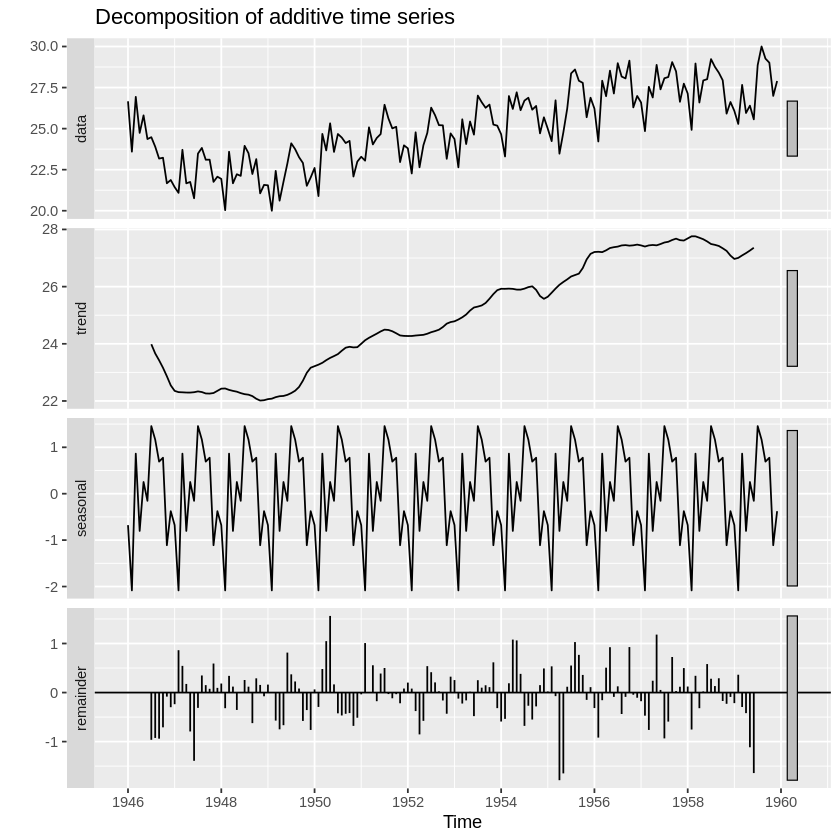

In [12]:
plot.ts(birth,main="뉴욕 월별 출생자수")
autoplot(decompose(birth))

In [13]:
birth1 <- diff(log(birth))
adf.test(birth1,alternative = "stationary",k=0)

Warning message in adf.test(birth1, alternative = "stationary", k = 0):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  birth1
Dickey-Fuller = -23.589, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


로그변환 - 차분 후 adf.test로 p-value 0.05이하이므로 정상성 확인됨

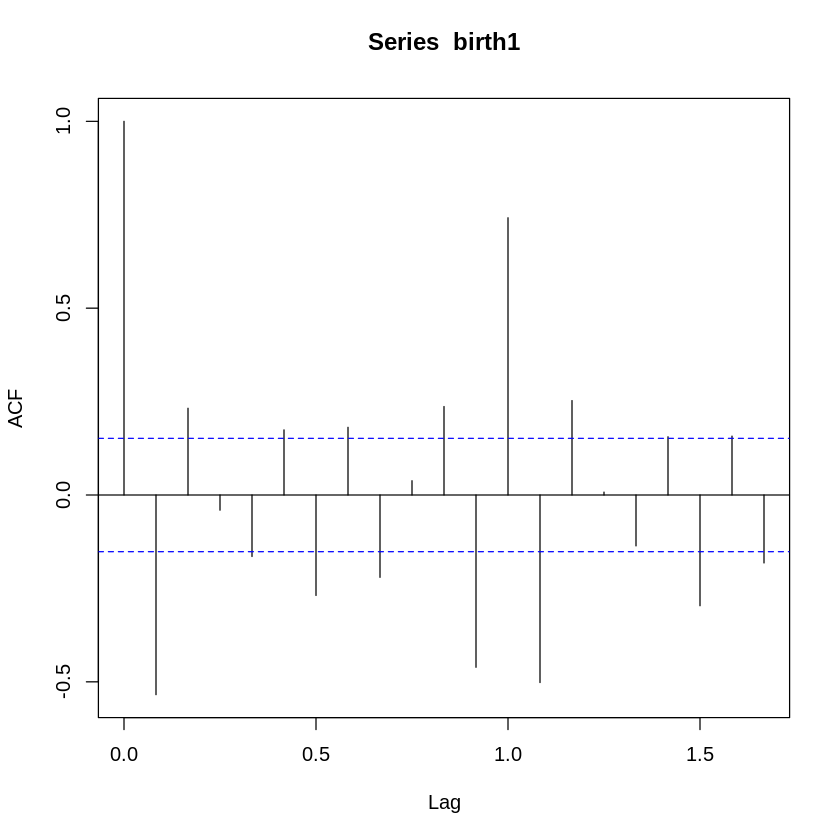

In [14]:
acf(birth1, lag.max=20)

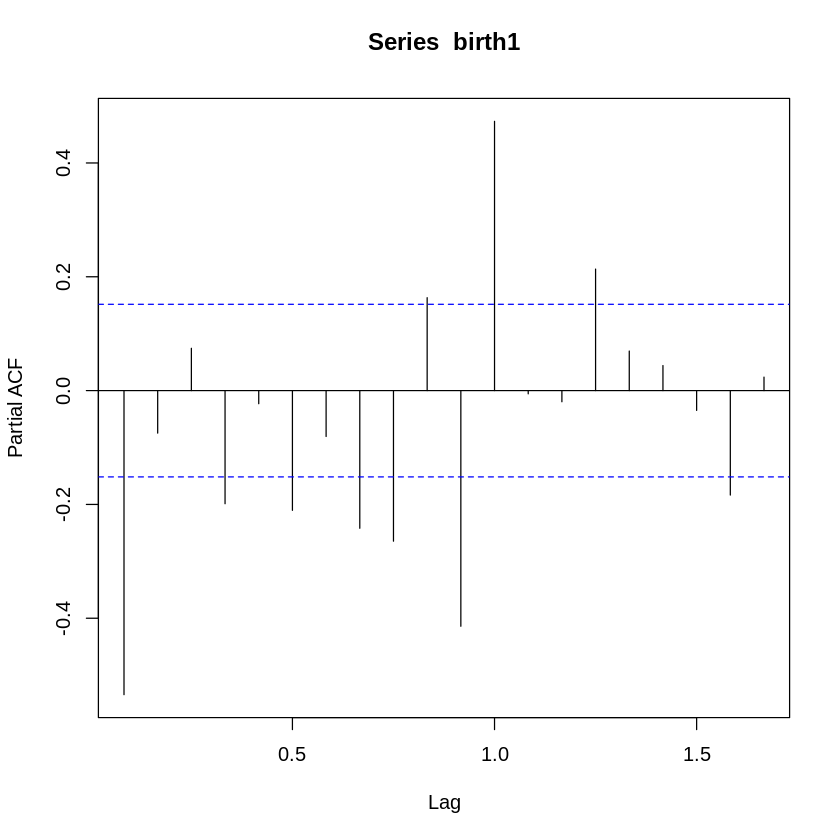

In [15]:
pacf(birth1, lag.max=20)

ACF, PACF 그래프로는 lag 절단점이 명확하지 않음. 들쑥 날쑥

Series: birth 
ARIMA(2,1,2)(1,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     ma2     sar1     sma1
      0.6539  -0.4540  -0.7255  0.2532  -0.2427  -0.8451
s.e.  0.3003   0.2429   0.3227  0.2878   0.0985   0.0995

sigma^2 estimated as 0.4076:  log likelihood=-157.45
AIC=328.91   AICc=329.67   BIC=350.21

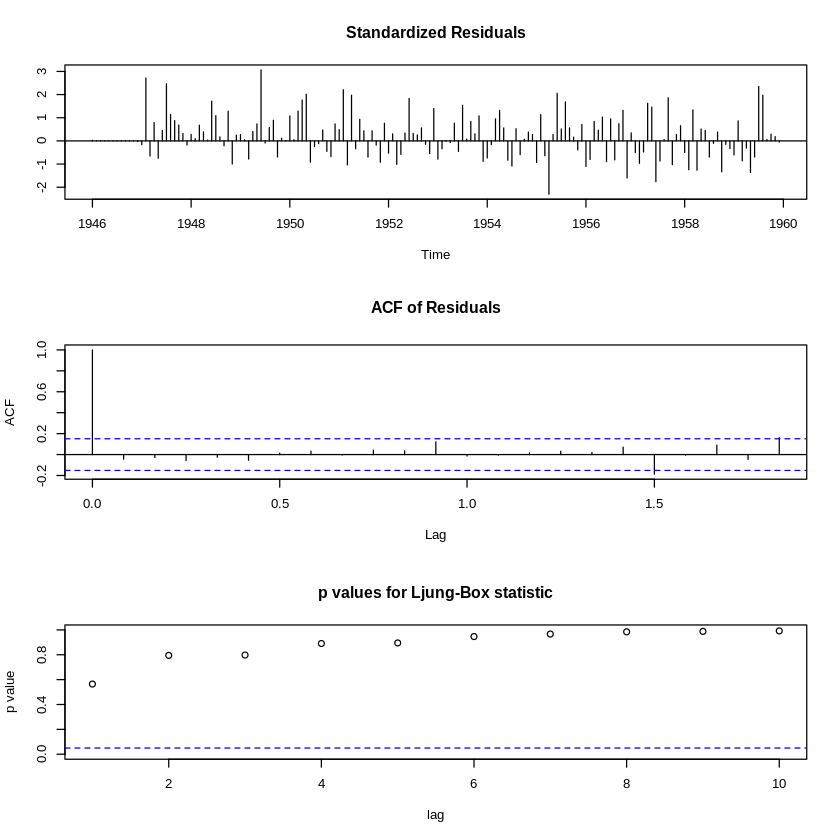

In [16]:
auto.arima(birth)
tsdiag(auto.arima(birth))

  - 첫번째 그래프를 보면 뚜렷한 증가 및 감소 패턴이 없음

  - 두번째 잔차의 자기상관함수 그래프(ACF of Residuals)를 보면 모두 파란선(임계치) 안에 들어있으므로 

    자기상관관계가 없고, 규칙성이 보이지 않음

  - 세번째 Box-Ljung 검정 그래프에서는 p-value값이 0이상으로 분포됨 (파란색 점선 : 유의확률 0.05)

  @ 위의 내용을 보면 ARIMA 모형이 양호한 시계열 모형을 보이며, 모델이 적합하다고 볼 수 있다.

In [17]:
birth_arima <- arima(birth, order = c(2,1,2), seasonal = list(order = c(1,1,1), period = 12))

birth_arima


Call:
arima(x = birth, order = c(2, 1, 2), seasonal = list(order = c(1, 1, 1), period = 12))

Coefficients:
         ar1      ar2      ma1     ma2     sar1     sma1
      0.6539  -0.4540  -0.7255  0.2532  -0.2427  -0.8451
s.e.  0.3003   0.2429   0.3227  0.2878   0.0985   0.0995

sigma^2 estimated as 0.3918:  log likelihood = -157.45,  aic = 328.91

[미래 추이에 대하여 예측하기]

In [18]:
birth_fcast <- forecast(birth_arima, h=12*2)  #12개월 주기로 향후 2년의 미래 추이를 예측, default값은 2년
birth_fcast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1960       27.69056 26.88679 28.49433 26.46130 28.91982
Feb 1960       26.07680 24.98034 27.17326 24.39991 27.75369
Mar 1960       29.26544 28.04020 30.49069 27.39160 31.13929
Apr 1960       27.59444 26.29165 28.89723 25.60199 29.58689
May 1960       28.93193 27.54860 30.31527 26.81630 31.04757
Jun 1960       28.55379 27.07347 30.03411 26.28983 30.81774
Jul 1960       29.84713 28.26538 31.42888 27.42806 32.26620
Aug 1960       29.45347 27.77916 31.12778 26.89284 32.01410
Sep 1960       29.16388 27.40777 30.91999 26.47814 31.84962
Oct 1960       29.21343 27.38167 31.04519 26.41200 32.01486
Nov 1960       27.26221 25.35695 29.16746 24.34837 30.17604
Dec 1960       28.06863 26.09098 30.04628 25.04408 31.09318
Jan 1961       27.66908 25.63754 29.70062 24.56210 30.77606
Feb 1961       26.21255 24.12791 28.29719 23.02437 29.40073
Mar 1961       29.22612 27.08633 31.36591 25.95360 32.49865
Apr 1961       27.58011 25.38474 29.7754

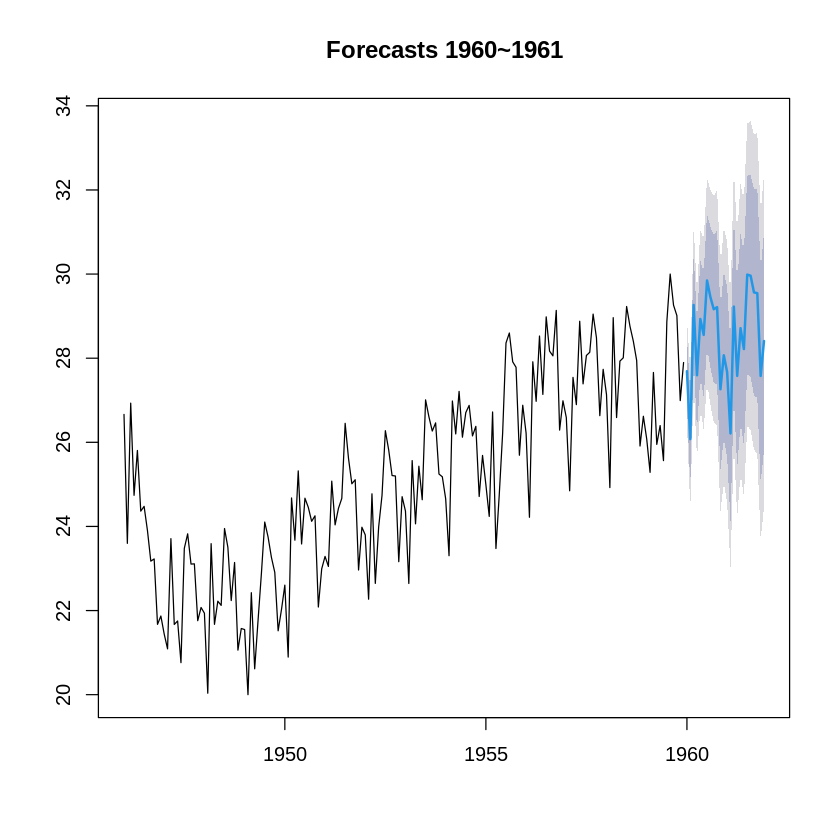

In [19]:
plot(birth_fcast, main = "Forecasts 1960~1961")